# Citrination Demo on Shape Memory Alloys
*Authors: Carena Church, Enze Chen, Julia Ling*

In this demo, we will look at how we can take data directly out of papers use them to build predictive models on the Citrination UI. We will work with a dataset for [shape memory alloys](https://en.wikipedia.org/wiki/Shape-memory_alloy) (SMAs), which are materials that are able to "remember" their shape such that post-deformation, they will return to their pre-deformed shape when heated. They present an attractive alternative to motorized actuators for many applications.

## Background knowledge
To get the most out of this demo, it is helpful to be familiar with:
* Python, and the [`pandas`](http://pandas.pydata.org/) library in particular.
* The main features on [Citrination](https://citrination.com). Tutorials for each feature can be found [here](https://github.com/CitrineInformatics/community-tools/tree/master/web_ui_examples).

## Imports

In [1]:
import pandas as pd # might have to upgrade pandas, in Terminal: "pip install --upgrade pandas"
from IPython.display import Image  # used for displaying screenshots

## Step 1: Read interesting paper, get data

A recent paper by [Xue et al. (2017)](https://www.sciencedirect.com/science/article/abs/pii/S1359645416309454) presented results on how optimal experimental design can be used to discover new SMAs. Specifically, they investigated the correlation between the alloy composition and the transition temperature.

In the paper by Xue et al., there is a data table in the supplementary files, which can be downloaded and saved as a CSV. This CSV is available in the `SMA_demo/` folder as `Xue_data.csv`.

## Step 2: Pre-process data

In the data table, the formula of the different alloys is not one of the columns. However, Citrination tends to give better predictions when the formula is available. So, let's do some pre-processing in Python to get the formula. The result of this pre-processing step is available as `SMA_demo/Xue_data_with_formula.csv`.

In [2]:
#  Read in CSV to pandas dataframe
data = pd.read_csv("./SMA_demo/Xue_data.csv", delimiter=',')
num_points = data.shape[0]

#  Create a pandas series to hold the formula
formula = pd.Series(num_points, index=data.index)
for i in range(num_points):
    string = "Ti0.5" # All alloys in the dataset are 50% titanium
    elements = ["Ni", "Cu", "Fe", "Pd"]
    for el in elements:
        if data[el][i] > 0:
            string += el + str(data[el][i]/100.)
    formula[i] = string
data = data.rename(index=str, columns={h:'PROPERTY: '+ h for h in list(data.columns)})
data = data.assign(formula=formula.values)

#  Write output to new CSV
data.to_csv("./SMA_demo/Xue_data_with_formula.csv", index=False, header=True)

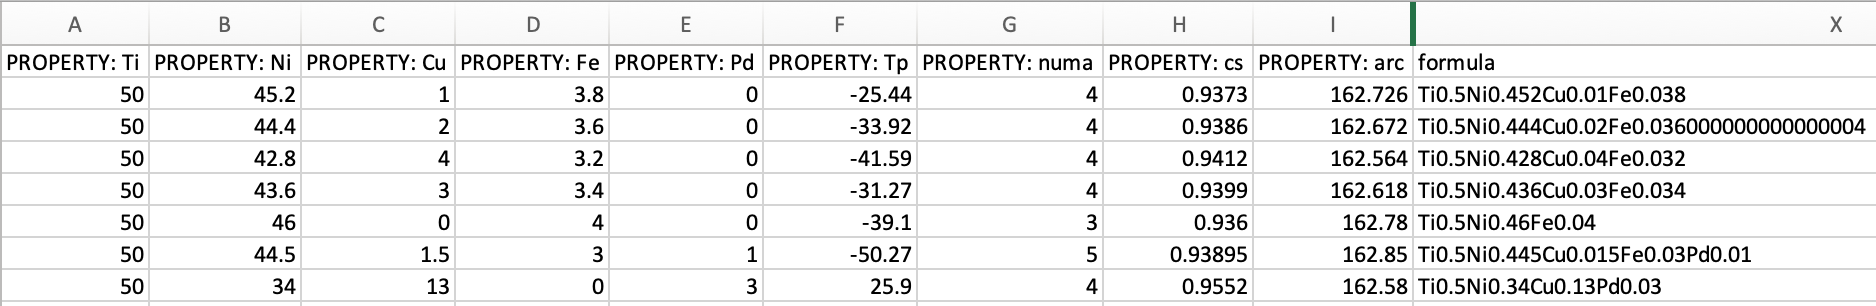

In [3]:
Image(filename='./SMA_demo/csv_postprocess.png', width=900)

## Step 3: Upload the data to Citrination

Once we have the CSV of the data from the table, we can [upload it](https://citrination.com/add_data) to Citrination. We'll need to choose a name and description for our dataset. Make sure to select the [Citrine: Template CSV](https://help.citrination.com/knowledgebase/articles/1188136-citrine-template-csv-csv) ingester from the drop down menu. Then click "Submit Files."

## Step 4: Create a data view and model

Now we can create a new [data view](https://citrination.com/data_views) using our new dataset. Go ahead and include all of the properties as column headers, except the elemental concentrations (Cu, Fe, Ni, Pd, Ti) which are already incorporated in "formula." When we're done, click "NEXT," which will prompt us for a name and description:

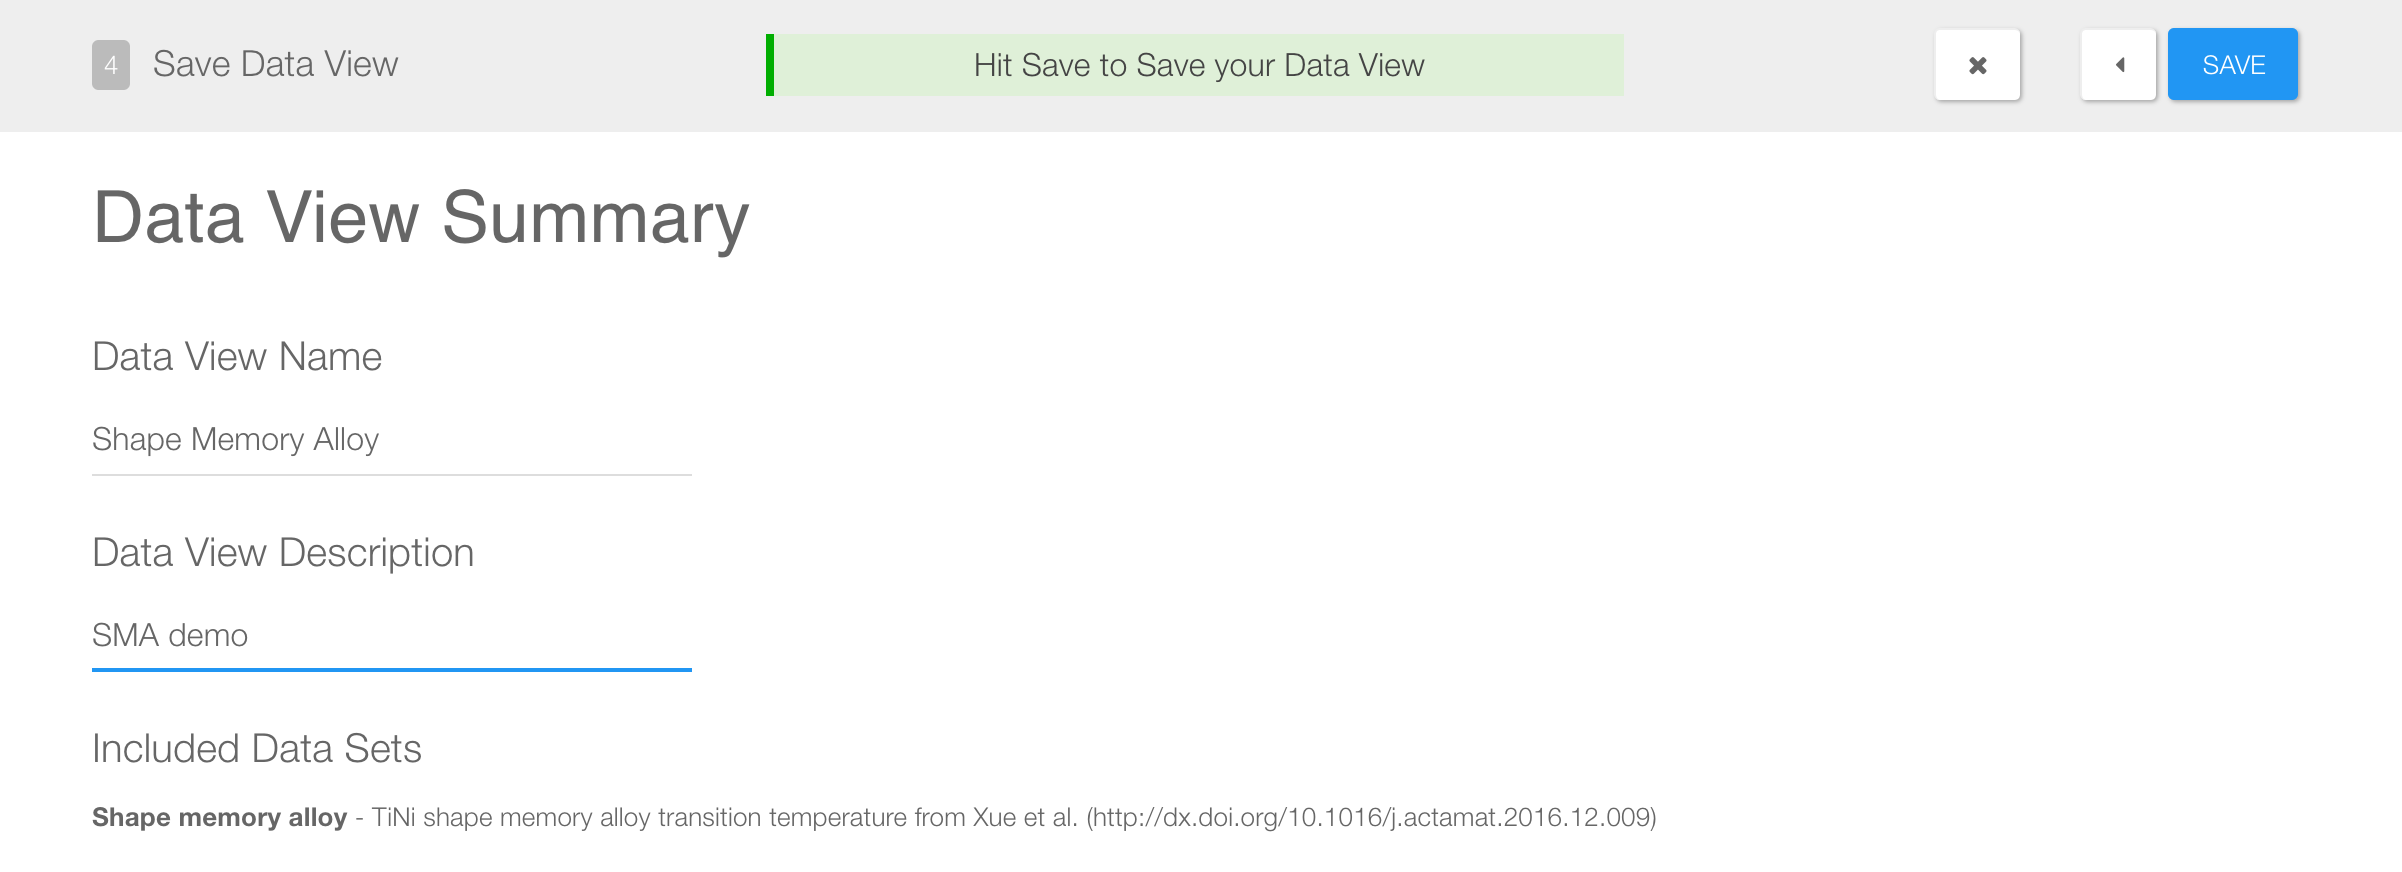

In [4]:
Image(filename='./SMA_demo/dataview_2.png', width=900)

After we click "SAVE," let's go ahead and configure ML. This next part might be slightly tedious, but we will set "Tp," the transition temperature, to be the only Output and change every other column to be an Input. Click "Save" when we're finished.

With ML configured, models will start to train in the background. After waiting for a short while, the training will complete and we can see the performance of our model under the "Reports" tab.

## Step 5: Analyze model reports

Now we can do things like look at model predictions at new test points (**Predict** tab), visualize our dataset using t-SNE (**Data Summary** tab), or examine the model quality (**Model Report** tab).

In the t-SNE plot under Data Summary, for example, we can easily spot clusters in our data and how the transition temperature differs among the groups of alloys. It appears that alloys with Pd in them tend to have a higher transition temperature.

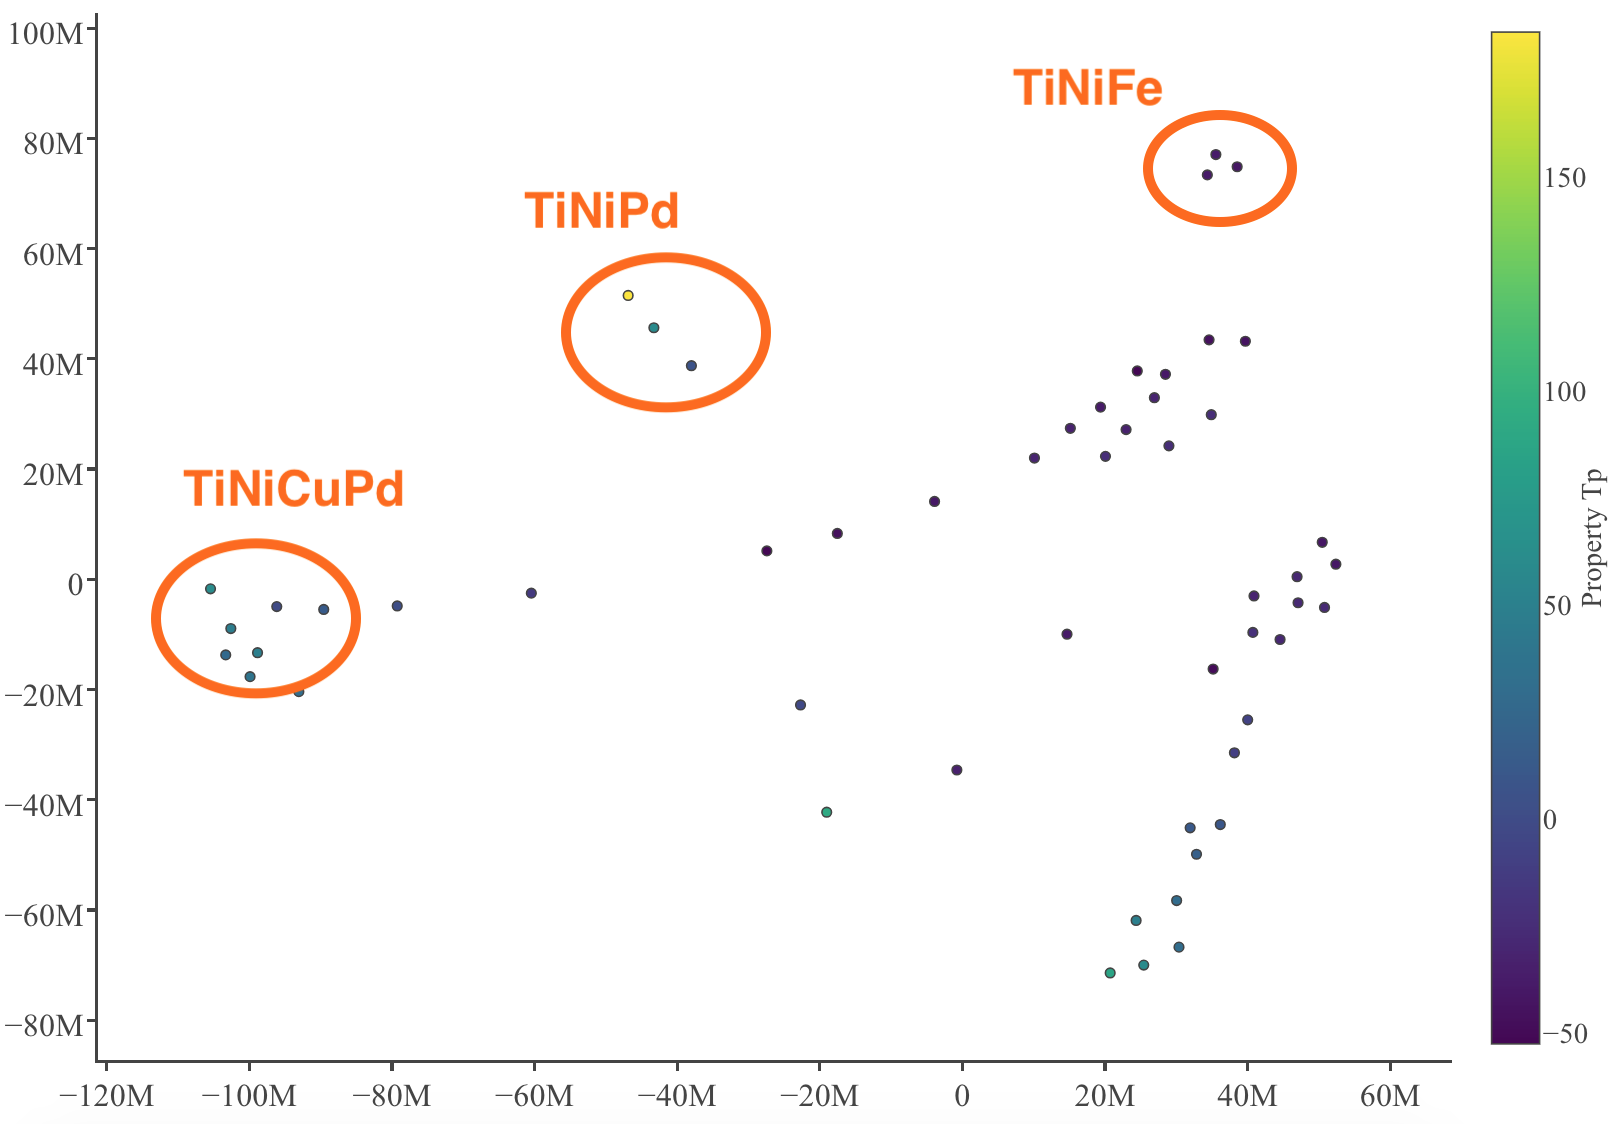

In [5]:
Image(filename='./SMA_demo/tsne.png', width=700)

In the Model Reports, we can see that the most important features in creating the ML model are the *Elemental crystal structure* and *Trouton's Ratio*. We can also look at the cross-validation predictions of our ML model, along with the associated error bars.

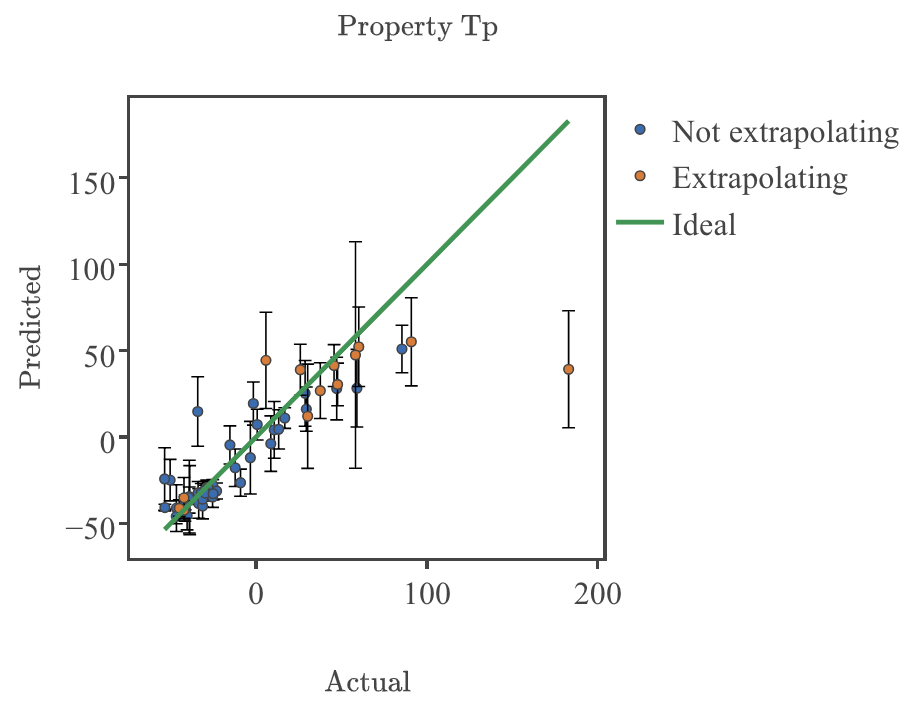

In [6]:
Image(filename='./SMA_demo/ml_predictions.png', width=700)

As this plot shows, our ML model for the transition temperature is pretty good! Quantitatively, the non-dimensional model error is 0.542, indicating that this model can be very effective for experimental design and making predictions for new alloy compositions. 

If we navigate to the **Design** tab, we can set up a design run and have the Citrination platform generate candidates to guide future experiments. The data from these experiments can then be added to the dataset to improve the quality of our models after retraining.

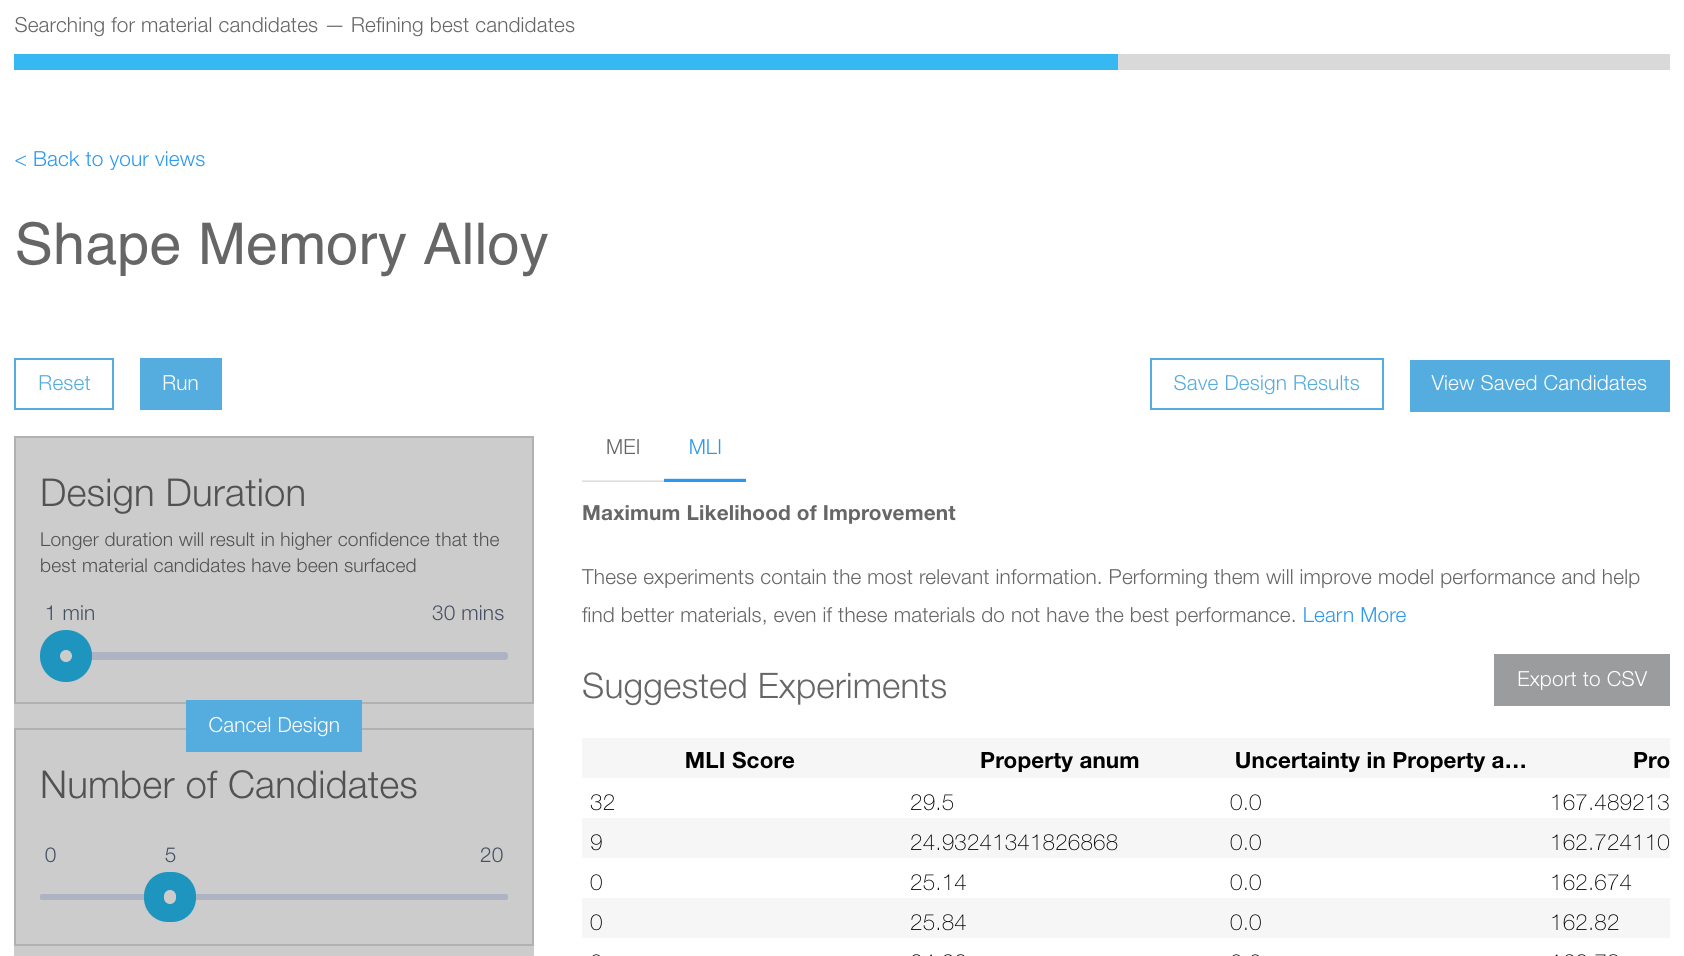

In [7]:
Image(filename='./SMA_demo/design.png', width=900)

## Conclusion
Congratulations! You now know how to go from reading an interesting journal article to creating a new machine learning model. Some key takeaways include:
* How to upload CSV files onto Citrination
* How to select columns during ML configuration
* How to interpret model reports
* How to set up a design run to generate candidate materials